# Brief intro to the contents of a notebook

In this notebook, we will first scrape the website of hh.uz to form a data frame, in order to analyze it and gain some knwoledge and insights of vacancies published here. All of the vacancies scraped are within Uzbekistan, so we will basically see what the companies of Uzbekistan want and what they are offerring.

# Purpose of a notebook

The main purpose of building a software to scrape, clean, analyze the data on web is to build a Machine Learning model that would predict the salary based on different data about the job such as location, company, requirements, etc. In addition, since the recent times I have been trying to learn different concepts, topics, and techniques in the field of ML & DL, so this project was supposed to provide me with hands-on experience in this direction and it actually did. I now know how to scrape the web and how to overcome the restrictions and attempts against scraping by most of the websites using libraries such as selenium. It is great feeling to have this skill, since I now have an access to huge volume of data people put on web

# Scraping

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests
import time
import re

In [3]:
hh_url = 'https://tashkent.hh.uz/search/vacancy?area=97'

In [4]:
# URL to extract full day jobs
fullday_url = f'{hh_url}&employment=full&search_field=name&search_field=company_name&search_field=description&enable_snippets=false&only_with_salary=true&text=&ored_clusters=true'

# URL to extract part day jobs
partday_url = f'{hh_url}&employment=part&search_field=name&search_field=company_name&search_field=description&enable_snippets=false&only_with_salary=true&text=&ored_clusters=true'

# URL to extract intern jobs
intern_url = f'{hh_url}&employment=probation&search_field=name&search_field=company_name&search_field=description&enable_snippets=false&only_with_salary=true&text=&ored_clusters=true'

# Empty lists to store scraped data
job_title = []
job_company = []
job_salary = []
job_city = []
job_experience = []

In [5]:
# Get all the fullday jobs

from selenium import webdriver

webdriver = webdriver.Chrome()

# Loop through 40 pages
for i in range(0, 40):
    # Construct URL for each page
    url = f'{fullday_url}&page={i}'

    # Use webdriver to get page
    webdriver.get(url)

    # Parse the page with BeautifulSoup
    soup = BeautifulSoup(webdriver.page_source, 'html.parser')

    # Find all job cards
    job_cards = soup.find_all('div', class_='vacancy-serp-item__layout')

    # Extract job title and company from each job card
    for job_card in job_cards:
        title = job_card.find('a', {'data-qa': "serp-item__title"})
        company = job_card.find('a', {'data-qa': "vacancy-serp__vacancy-employer"})
        salary = job_card.find('span', {'data-qa': 'vacancy-serp__vacancy-compensation'})
        city = job_card.find('div', {'data-qa': 'vacancy-serp__vacancy-address'})
        experience = job_card.find('div', {'data-qa': 'vacancy-serp__vacancy-work-experience'})

        # Append job title and company to their respective lists
        # If job title or company is not found, append an empty string
        job_title.append(title.text if title else "")
        job_company.append(company.text if company else "")
        job_salary.append(salary.text if salary else "")
        job_city.append(city.text if city else "")
        job_experience.append(experience.text if experience else "")

    print(f"Page {i} scraped. Job titles found: {len(job_title)}")

webdriver.close()

Page 0 scraped. Job titles found: 50
Page 1 scraped. Job titles found: 100
Page 2 scraped. Job titles found: 150
Page 3 scraped. Job titles found: 200
Page 4 scraped. Job titles found: 250
Page 5 scraped. Job titles found: 300
Page 6 scraped. Job titles found: 350
Page 7 scraped. Job titles found: 400
Page 8 scraped. Job titles found: 450
Page 9 scraped. Job titles found: 500
Page 10 scraped. Job titles found: 550
Page 11 scraped. Job titles found: 600
Page 12 scraped. Job titles found: 650
Page 13 scraped. Job titles found: 700
Page 14 scraped. Job titles found: 750
Page 15 scraped. Job titles found: 800
Page 16 scraped. Job titles found: 850
Page 17 scraped. Job titles found: 900
Page 18 scraped. Job titles found: 950
Page 19 scraped. Job titles found: 1000
Page 20 scraped. Job titles found: 1050
Page 21 scraped. Job titles found: 1100
Page 22 scraped. Job titles found: 1150
Page 23 scraped. Job titles found: 1200
Page 24 scraped. Job titles found: 1250
Page 25 scraped. Job titles fo

In [6]:
print(len(job_title))
print(len(job_company))
print(len(job_salary))
print(len(job_city))
print(len(job_experience))

2000
2000
2000
2000
2000


In [7]:
print(job_salary[5])

от 2 000 000 so'm


In [8]:
# Create a dataframe
df = pd.DataFrame({'title': job_title, 'company': job_company, 'salary': job_salary, 'city': job_city, 'experience': job_experience})

In [9]:
df.describe()

,title,company,salary,city,experience
count,2000,2000,2000,2000,2000
unique,1326,610,481,58,4
top,Грузчик-комплектовщик на склад,ООО Uzum Market,от 5 000 000 so'm,Ташкент,Опыт от 1 года до 3 лет
freq,40,55,79,1548,1108


In [10]:
# Amount of unique values in each column
df.nunique()

title         1326
company        610
salary         481
city            58
experience       4
dtype: int64

In [11]:
city = df['city'].value_counts()
city

Ташкент                 1548
Самарканд                 85
Андижан                   32
Бухара                    31
Наманган                  27
Навои                     25
Карши                     24
Джизак                    23
Фергана                   23
Коканд                    20
Ургенч                    18
Чирчик                    17
Ангрен                    15
Нукус                     13
Термез                    10
Алмалык                    8
Гулистан                   7
Маргилан                   6
Сырдарья                   5
Бекабад                    4
Шахрисабз                  4
Хива                       4
Каттакурган                4
Паркент                    3
Янгиюль                    3
Гиждуван                   2
Зарафшан                   2
Учкудук                    2
Кунград                    2
Шахрихан                   2
Чартак                     2
Ходжейли                   2
Аккурган                   2
Газалкент                  1
Касан         

In [12]:
# Save the dataframe to a csv file
df.to_csv('hh.csv', index=False)

In [13]:
# Replace Без опыта with 0 in experience column
df['experience'] = df['experience'].replace('Без опыта', '0')

# Replace Опыт от 1 года до 3 лет with 1-3 in experience column
df['experience'] = df['experience'].replace('Опыт от 1 года до 3 лет', '1-3')

# Replace Опыт от 3 до 6 лет with 3-6 in experience column
df['experience'] = df['experience'].replace('Опыт от 3 до 6 лет', '3-6')

# Replace Опыт более 6 лет with 6+ in experience column
df['experience'] = df['experience'].replace('Опыт более 6 лет', '6+')

In [14]:
# Save the dataframe to a csv file
df.to_csv('hh.csv', index=False)

In [15]:
import re

def convert_salary_to_uzs(salary, exchange_rate, currency):
    # Check if the salary is in USD
    if not salary.endswith(currency):
        return salary  # If not in USD, return the original string

    # Replace the non-breaking space character with an empty string
    salary = salary.replace('\u202f', '')

    # Identify the format of the salary and extract the numeric part(s)
    if "от" in salary:
        # Format is "от X $"
        amount_usd = re.findall(r'\d+', salary)[0]  # Extract the numeric part
        amount_uzs = int(amount_usd) * exchange_rate  # Convert to UZS
        return "от " + str(amount_uzs) + " so'm"  # Construct the new salary string
    elif "–" in salary:
        # Format is "X – Y $"
        amounts_usd = re.findall(r'\d+', salary)  # Extract the numeric parts
        amounts_uzs = [int(amount) * exchange_rate for amount in amounts_usd]  # Convert to UZS
        return str(amounts_uzs[0]) + " – " + str(amounts_uzs[1]) + " so'm"  # Construct the new salary string
    elif "до" in salary:
        # Format is "до X $"
        amount_usd = re.findall(r'\d+', salary)[0]  # Extract the numeric part
        amount_uzs = int(amount_usd) * exchange_rate  # Convert to UZS
        return "до " + str(amount_uzs) + " so'm"  # Construct the new salary string
    else:
        return salary  # If the format is not recognized, return the original string

In [16]:
salary = df['salary']
# apply the function to the salary column
salary = salary.apply(convert_salary_to_uzs, exchange_rate=11500, currency='$')
salary = salary.apply(convert_salary_to_uzs, exchange_rate=130, currency='₽')
salary = salary.apply(convert_salary_to_uzs, exchange_rate=12600, currency='€')
salary = salary.apply(convert_salary_to_uzs, exchange_rate=25.55, currency='₸')

In [17]:
salary.head(50)

0            4600000 – 17250000 so'm
1         5 180 000 – 5 180 000 so'm
2        3 700 000 – 10 000 000 so'm
3                  от 9 000 000 so'm
4        2 500 000 – 15 000 000 so'm
5                  от 2 000 000 so'm
6                  до 4 000 000 so'm
7       12 000 000 – 18 000 000 so'm
8         6 000 000 – 8 000 000 so'm
9         3 500 000 – 9 000 000 so'm
10        2 500 000 – 5 000 000 so'm
11                 от 4 000 000 so'm
12                 от 4 000 000 so'm
13                 до 7 000 000 so'm
14        4 000 000 – 5 000 000 so'm
15                 от 3 000 000 so'm
16        4 000 000 – 7 000 000 so'm
17       3 000 000 – 15 000 000 so'm
18        5 000 000 – 7 000 000 so'm
19        3 000 000 – 5 000 000 so'm
20      10 000 000 – 20 000 000 so'm
21            3250000 – 5200000 so'm
22        4 000 000 – 5 000 000 so'm
23        5 000 000 – 7 000 000 so'm
24      10 000 000 – 10 000 000 so'm
25        4 000 000 – 5 000 000 so'm
26       5 000 000 – 10 000 000 so'm
2

In [18]:
df['salary'].head(50)

0                    400 – 1 500 $
1       5 180 000 – 5 180 000 so'm
2      3 700 000 – 10 000 000 so'm
3                от 9 000 000 so'm
4      2 500 000 – 15 000 000 so'm
5                от 2 000 000 so'm
6                до 4 000 000 so'm
7     12 000 000 – 18 000 000 so'm
8       6 000 000 – 8 000 000 so'm
9       3 500 000 – 9 000 000 so'm
10      2 500 000 – 5 000 000 so'm
11               от 4 000 000 so'm
12               от 4 000 000 so'm
13               до 7 000 000 so'm
14      4 000 000 – 5 000 000 so'm
15               от 3 000 000 so'm
16      4 000 000 – 7 000 000 so'm
17     3 000 000 – 15 000 000 so'm
18      5 000 000 – 7 000 000 so'm
19      3 000 000 – 5 000 000 so'm
20    10 000 000 – 20 000 000 so'm
21               25 000 – 40 000 ₽
22      4 000 000 – 5 000 000 so'm
23      5 000 000 – 7 000 000 so'm
24    10 000 000 – 10 000 000 so'm
25      4 000 000 – 5 000 000 so'm
26     5 000 000 – 10 000 000 so'm
27      5 000 000 – 8 000 000 so'm
28      2 500 000 – 

In [19]:
salary.to_csv('salary.csv', index=False)

In [20]:
# Get rid of so'm in salary column
salary = salary.str.replace('so\'m', '')

In [21]:
salary.head(50)

0            4600000 – 17250000 
1         5 180 000 – 5 180 000 
2        3 700 000 – 10 000 000 
3                  от 9 000 000 
4        2 500 000 – 15 000 000 
5                  от 2 000 000 
6                  до 4 000 000 
7       12 000 000 – 18 000 000 
8         6 000 000 – 8 000 000 
9         3 500 000 – 9 000 000 
10        2 500 000 – 5 000 000 
11                 от 4 000 000 
12                 от 4 000 000 
13                 до 7 000 000 
14        4 000 000 – 5 000 000 
15                 от 3 000 000 
16        4 000 000 – 7 000 000 
17       3 000 000 – 15 000 000 
18        5 000 000 – 7 000 000 
19        3 000 000 – 5 000 000 
20      10 000 000 – 20 000 000 
21            3250000 – 5200000 
22        4 000 000 – 5 000 000 
23        5 000 000 – 7 000 000 
24      10 000 000 – 10 000 000 
25        4 000 000 – 5 000 000 
26       5 000 000 – 10 000 000 
27        5 000 000 – 8 000 000 
28        2 500 000 – 5 000 000 
29       4 000 000 – 20 000 000 
30        

In [22]:
import numpy as np

def add_bounds(salary):
    if pd.isnull(salary):
        return salary
    
    # Replace non-breaking spaces with no space
    salary_numeric = salary.replace('\u202f', '').replace('₽', '').strip()
    
    if 'от' in salary:
        # Remove 'от' and trailing whitespace
        salary_numeric = salary_numeric.replace('от', '').strip()
        # Convert to float, calculate 125% of the salary, and convert to int
        salary_range = int(float(salary_numeric) * 1.25)
        # Format the salary string
        return f"{int(float(salary_numeric)):,} - {salary_range:,}"
        
    elif 'до' in salary:
        # Remove 'до' and trailing whitespace
        salary_numeric = salary_numeric.replace('до', '').strip()
        # Convert to float, calculate 75% of the salary, and convert to int
        salary_range = int(float(salary_numeric) * 0.75)
        # Format the salary string
        return f"{salary_range:,} - {int(float(salary_numeric)):,}"
      
    else:
        # If salary doesn't contain 'от' or 'до', return as is
        return salary_numeric

In [23]:
# Apply the function to the salary column
salary1 = salary.apply(add_bounds)

In [24]:
salary1.head(50)

0            4600000 – 17250000
1             5180000 – 5180000
2            3700000 – 10000000
3        9,000,000 - 11,250,000
4            2500000 – 15000000
5         2,000,000 - 2,500,000
6         3,000,000 - 4,000,000
7           12000000 – 18000000
8             6000000 – 8000000
9             3500000 – 9000000
10            2500000 – 5000000
11        4,000,000 - 5,000,000
12        4,000,000 - 5,000,000
13        5,250,000 - 7,000,000
14            4000000 – 5000000
15        3,000,000 - 3,750,000
16            4000000 – 7000000
17           3000000 – 15000000
18            5000000 – 7000000
19            3000000 – 5000000
20          10000000 – 20000000
21            3250000 – 5200000
22            4000000 – 5000000
23            5000000 – 7000000
24          10000000 – 10000000
25            4000000 – 5000000
26           5000000 – 10000000
27            5000000 – 8000000
28            2500000 – 5000000
29           4000000 – 20000000
30            5000000 – 7000000
31      

In [25]:
def format_salary(salary):
    # Check if salary contains '–'
    if '–' not in salary:
        return salary
    
    # Split the salary range into min and max salary
    min_salary, max_salary = salary.split('–')
    
    # Remove commas and strip whitespace
    min_salary = min_salary.replace(',', '').strip()
    max_salary = max_salary.replace(',', '').strip()
    
    # Convert to float (to handle any fractional part), then to int
    min_salary = int(float(min_salary))
    max_salary = int(float(max_salary))
    
    # Format the salaries with comma as thousand separator
    min_salary = f"{min_salary:,}"
    max_salary = f"{max_salary:,}"
    
    # Return the formatted salary range
    return f"{min_salary} – {max_salary}"

# Apply the function to each row of the salary data
formatted_salaries = salary1.apply(format_salary)

In [26]:
formatted_salaries.head(50)

0        4,600,000 – 17,250,000
1         5,180,000 – 5,180,000
2        3,700,000 – 10,000,000
3        9,000,000 - 11,250,000
4        2,500,000 – 15,000,000
5         2,000,000 - 2,500,000
6         3,000,000 - 4,000,000
7       12,000,000 – 18,000,000
8         6,000,000 – 8,000,000
9         3,500,000 – 9,000,000
10        2,500,000 – 5,000,000
11        4,000,000 - 5,000,000
12        4,000,000 - 5,000,000
13        5,250,000 - 7,000,000
14        4,000,000 – 5,000,000
15        3,000,000 - 3,750,000
16        4,000,000 – 7,000,000
17       3,000,000 – 15,000,000
18        5,000,000 – 7,000,000
19        3,000,000 – 5,000,000
20      10,000,000 – 20,000,000
21        3,250,000 – 5,200,000
22        4,000,000 – 5,000,000
23        5,000,000 – 7,000,000
24      10,000,000 – 10,000,000
25        4,000,000 – 5,000,000
26       5,000,000 – 10,000,000
27        5,000,000 – 8,000,000
28        2,500,000 – 5,000,000
29       4,000,000 – 20,000,000
30        5,000,000 – 7,000,000
31      

In [27]:
# Change 18th row to 4,000,000 - 4,500,000
formatted_salaries[17] = '4,000,000 - 4,500,000'

In [28]:
formatted_salaries.head(28)

0      4,600,000 – 17,250,000
1       5,180,000 – 5,180,000
2      3,700,000 – 10,000,000
3      9,000,000 - 11,250,000
4      2,500,000 – 15,000,000
5       2,000,000 - 2,500,000
6       3,000,000 - 4,000,000
7     12,000,000 – 18,000,000
8       6,000,000 – 8,000,000
9       3,500,000 – 9,000,000
10      2,500,000 – 5,000,000
11      4,000,000 - 5,000,000
12      4,000,000 - 5,000,000
13      5,250,000 - 7,000,000
14      4,000,000 – 5,000,000
15      3,000,000 - 3,750,000
16      4,000,000 – 7,000,000
17      4,000,000 - 4,500,000
18      5,000,000 – 7,000,000
19      3,000,000 – 5,000,000
20    10,000,000 – 20,000,000
21      3,250,000 – 5,200,000
22      4,000,000 – 5,000,000
23      5,000,000 – 7,000,000
24    10,000,000 – 10,000,000
25      4,000,000 – 5,000,000
26     5,000,000 – 10,000,000
27      5,000,000 – 8,000,000
Name: salary, dtype: object

In [29]:
# find the number of salaries more than 20,000,000
formatted_salaries[formatted_salaries.str.contains('20,000,000')]

20      10,000,000 – 20,000,000
29       4,000,000 – 20,000,000
37      15,000,000 – 20,000,000
39       5,000,000 – 20,000,000
153      4,000,000 – 20,000,000
170     20,000,000 - 25,000,000
249      2,000,000 – 20,000,000
253     20,000,000 – 80,000,000
257     15,000,000 – 20,000,000
276     18,000,000 – 20,000,000
308     15,000,000 – 20,000,000
351     10,000,000 – 20,000,000
416     15,000,000 – 20,000,000
448     20,000,000 - 25,000,000
485     20,000,000 - 25,000,000
524     15,000,000 – 20,000,000
535     11,000,000 – 20,000,000
580     15,000,000 – 20,000,000
601     15,000,000 - 20,000,000
686      5,000,000 – 20,000,000
728     20,000,000 - 25,000,000
758     20,000,000 - 25,000,000
821      8,000,000 – 20,000,000
845     20,000,000 - 25,000,000
881     20,000,000 - 25,000,000
1029    15,000,000 – 20,000,000
1064     6,000,000 – 20,000,000
1094    10,000,000 – 20,000,000
1107    15,000,000 - 20,000,000
1137    15,000,000 – 20,000,000
1158    15,000,000 – 20,000,000
1176    

In [30]:
df['salary'] = formatted_salaries

In [31]:
df.head(28)

,title,company,salary,city,experience
0,Менеджер по продажам / консультант международн...,ООО ALLIANCE AZIA GROUP,"4,600,000 – 17,250,000",Ташкент,0
1,Оператор колл-центра,ИП SKY-TRANSKZ,"5,180,000 – 5,180,000",Ташкент,0
2,Продавец консультант в магазин слуховых аппаратов,ООО ISTOK MED,"3,700,000 – 10,000,000",Ташкент,0
3,Менеджер ресторана,Pro Food & beverages,"9,000,000 - 11,250,000",Ташкент,1-3
4,Продавец-консультант,ООО Credit Asia,"2,500,000 – 15,000,000",Ташкент,0
5,Блогер,Частный детский сад «Zazu King International»,"2,000,000 - 2,500,000",Ташкент,0
6,Мерчендайзер,ООО AION BEVERAGES,"3,000,000 - 4,000,000",Ташкент,0
7,Финансовый менеджер,OOO DAVLATOV INDUSTRIES,"12,000,000 – 18,000,000",Ташкент,6+
8,Системный администратор,OOO DAVLATOV INDUSTRIES,"6,000,000 – 8,000,000",Ташкент,1-3
9,Менеджер по работе с клиентами,ООО ENERGY SOLUTIONS TRADE,"3,500,000 – 9,000,000",Ташкент,0


# Cleaning

In [32]:
print(df['title'].value_counts())

Грузчик-комплектовщик на склад                         40
Менеджер по продажам                                   36
Торговый представитель                                 29
Продавец-консультант                                   24
Оператор call-центра                                   24
                                                       ..
Продавец-консультант (ул. Мукимий)                      1
Главная медицинская сестра/главный медицинский брат     1
Переплетчик в типографию (ручные работы)                1
Менеджер по подбору и адаптации персонала               1
Специалист по продажам медикаментов, Самарканд          1
Name: title, Length: 1326, dtype: int64


In [33]:
# Amount of unique values in title column
df['title'].nunique()

1326

In [34]:
def preprocess_text(sen):
    # Remove punctuations and numbers
    sentence = re.sub('[^а-яА-Яa-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[а-яА-Яa-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence.lower()

In [35]:
title = df['title']
title = title.apply(preprocess_text)
df['title'] = title

In [36]:
title.head(50)

0     менеджер по продажам консультант международног...
1                                  оператор колл центра
2       продавец консультант магазин слуховых аппаратов
3                                    менеджер ресторана
4                                  продавец консультант
5                                                блогер
6                                          мерчендайзер
7                                   финансовый менеджер
8                               системный администратор
9                          менеджер по работе клиентами
10    продавец консультант магазин core максим горький 
11                                 исследователь стажер
12    продавец консультант сеть магазинов спортивной...
13                     ассистент генерального директора
14                          оператор контактного центра
15                                      продавец кассир
16                              промоутер представитель
17                                менеджер отдел

In [37]:
# split the title column into 2 columns, where the first column is the first word and the second column is the rest of the words
# if the first word ends with 'ый', 'ий', 'ой', 'ая', 'яя', 'ое', 'ее', 'ые', 'ие' then the first two words are placed in first column
def split_title(title):
    words = title.split()
    first_word = words[0]
    endings = ['ый', 'ий', 'ой', 'ая', 'яя', 'ое', 'ее', 'ые', 'ие']
    if any(first_word.endswith(ending) for ending in endings) and len(words) > 1:
        return " ".join(words[:2]), " ".join(words[2:])
    else:
        return first_word, " ".join(words[1:])


In [38]:
# Define regex patterns
pattern1 = r'\b\w*(?:ый|ий|ой|ая|яя|ое|ее|ые|ие|ер|ист|ик|щик|ор|ник|ент|ар|ёр|истр|чикэ|ерт|онсультант|ан|атор|ватель|ир|ец|лог|ель|smm|смм)\b'
pattern2 = r'\b\w*\b'

# Apply regex patterns to the 'title' column
df['first_column'] = df['title'].apply(lambda x: ' '.join(re.findall(pattern1, x)))
df['second_column'] = df['title'].apply(lambda x: ' '.join([word for word in re.findall(pattern2, x) if word not in re.findall(pattern1, x)]))


In [39]:
df.head(100)

,title,company,salary,city,experience,first_column,second_column
0,менеджер по продажам консультант международног...,ООО ALLIANCE AZIA GROUP,"4,600,000 – 17,250,000",Ташкент,0,менеджер консультант,по продажам международного отдыха
1,оператор колл центра,ИП SKY-TRANSKZ,"5,180,000 – 5,180,000",Ташкент,0,оператор,колл центра
2,продавец консультант магазин слуховых аппаратов,ООО ISTOK MED,"3,700,000 – 10,000,000",Ташкент,0,продавец консультант,магазин слуховых аппаратов
3,менеджер ресторана,Pro Food & beverages,"9,000,000 - 11,250,000",Ташкент,1-3,менеджер,ресторана
4,продавец консультант,ООО Credit Asia,"2,500,000 – 15,000,000",Ташкент,0,продавец консультант,
...,...,...,...,...,...,...,...
95,менеджер зп от сум,ООО Reikartz Technology,"12,000,000 - 15,000,000",Самарканд,0,менеджер,зп от сум
96,администратор кассир,ООО Uzum Market,"3,000,000 – 5,000,000",Андижан,1-3,администратор кассир,
97,оператор call центра,ООО NEW ALHADAYA ТМ UCRM 2022,"5,000,000 - 6,250,000",Ташкент,0,оператор,call центра
98,администратор торгового зала,ИП ООО ASTANA MOTORS COMPANY,"5,000,000 - 6,250,000",Ташкент,0,администратор,торгового зала


In [40]:
# Change the name of the first column to 'job_title'
df.rename(columns={'first_column': 'job_title'}, inplace=True)

# Change the name of the second column to 'job_details'
df.rename(columns={'second_column': 'job_details'}, inplace=True)

In [41]:
# Replace empty strings with NaN
df['job_title'].replace('', np.nan, inplace=True)

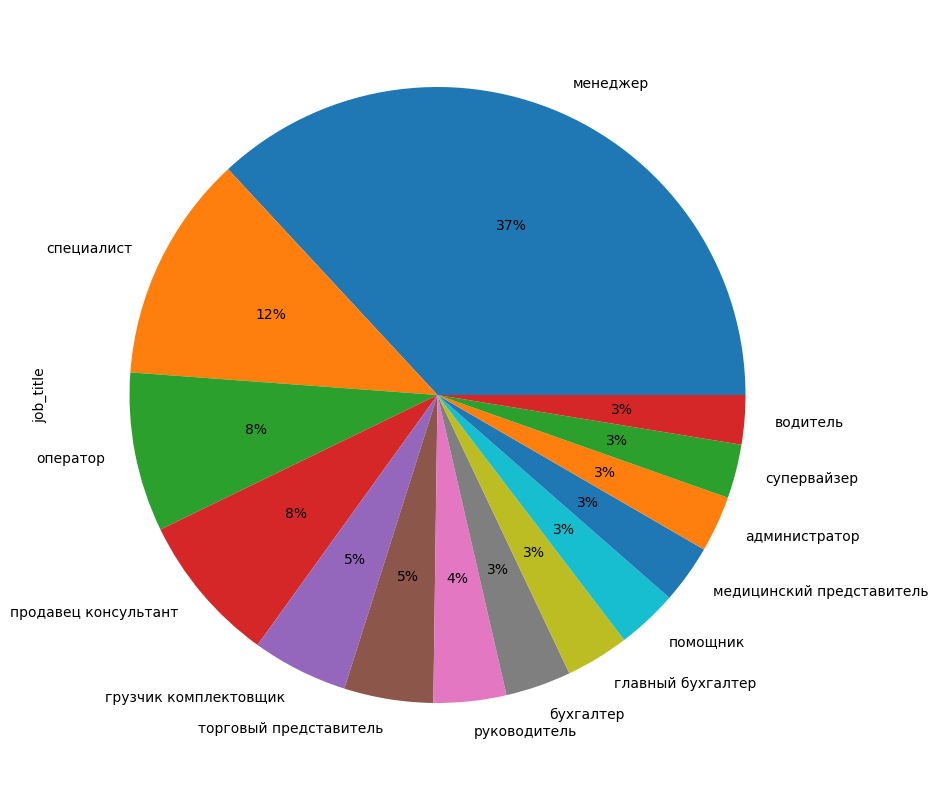

In [44]:
# Pie chart of job titles with more than 20 occurrences
plt.figure(figsize=(10, 10))
df['job_title'].value_counts()[df['job_title'].value_counts() > 20].plot(kind='pie', autopct='%1.0f%%')
plt.show()

In [43]:
df.to_csv('hh.csv', index=False)

In [68]:
# Extract all the chars before the first space
df['min_salary'] = df['salary'].str.split(' ').str[0]

# Remove all the ',' from the min_salary column
df['min_salary'] = df['min_salary'].str.replace(',', '')

# Extract all the chars before the first space
df['max_salary'] = df['salary'].str.split(' ').str[2]

# Remove all the ',' from the min_salary column
df['max_salary'] = df['max_salary'].str.replace(',', '')

In [69]:
df.head(50)

,title,company,salary,city,experience,job_title,job_details,min_salary,max_salary
0,менеджер по продажам консультант международног...,ООО ALLIANCE AZIA GROUP,"4,600,000 – 17,250,000",Ташкент,0,менеджер консультант,по продажам международного отдыха,4600000,17250000
1,оператор колл центра,ИП SKY-TRANSKZ,"5,180,000 – 5,180,000",Ташкент,0,оператор,колл центра,5180000,5180000
2,продавец консультант магазин слуховых аппаратов,ООО ISTOK MED,"3,700,000 – 10,000,000",Ташкент,0,продавец консультант,магазин слуховых аппаратов,3700000,10000000
3,менеджер ресторана,Pro Food & beverages,"9,000,000 - 11,250,000",Ташкент,1-3,менеджер,ресторана,9000000,11250000
4,продавец консультант,ООО Credit Asia,"2,500,000 – 15,000,000",Ташкент,0,продавец консультант,,2500000,15000000
5,блогер,Частный детский сад «Zazu King International»,"2,000,000 - 2,500,000",Ташкент,0,блогер,,2000000,2500000
6,мерчендайзер,ООО AION BEVERAGES,"3,000,000 - 4,000,000",Ташкент,0,мерчендайзер,,3000000,4000000
7,финансовый менеджер,OOO DAVLATOV INDUSTRIES,"12,000,000 – 18,000,000",Ташкент,6+,финансовый менеджер,,12000000,18000000
8,системный администратор,OOO DAVLATOV INDUSTRIES,"6,000,000 – 8,000,000",Ташкент,1-3,системный администратор,,6000000,8000000
9,менеджер по работе клиентами,ООО ENERGY SOLUTIONS TRADE,"3,500,000 – 9,000,000",Ташкент,0,менеджер,по работе клиентами,3500000,9000000


In [70]:
# Remove the columns title, salary
df.drop(['title', 'salary'], axis=1, inplace=True)

In [71]:
df.head(50)

,company,city,experience,job_title,job_details,min_salary,max_salary
0,ООО ALLIANCE AZIA GROUP,Ташкент,0,менеджер консультант,по продажам международного отдыха,4600000,17250000
1,ИП SKY-TRANSKZ,Ташкент,0,оператор,колл центра,5180000,5180000
2,ООО ISTOK MED,Ташкент,0,продавец консультант,магазин слуховых аппаратов,3700000,10000000
3,Pro Food & beverages,Ташкент,1-3,менеджер,ресторана,9000000,11250000
4,ООО Credit Asia,Ташкент,0,продавец консультант,,2500000,15000000
5,Частный детский сад «Zazu King International»,Ташкент,0,блогер,,2000000,2500000
6,ООО AION BEVERAGES,Ташкент,0,мерчендайзер,,3000000,4000000
7,OOO DAVLATOV INDUSTRIES,Ташкент,6+,финансовый менеджер,,12000000,18000000
8,OOO DAVLATOV INDUSTRIES,Ташкент,1-3,системный администратор,,6000000,8000000
9,ООО ENERGY SOLUTIONS TRADE,Ташкент,0,менеджер,по работе клиентами,3500000,9000000


### We are converting string values into pure numerical indexes in order to easier data manipulation without further boilerplate code
### So here in experience column the following indexes are set:
### 0 = 0 years
### 1 = 1-3 years
### 2 = 3-6 years
### 3 = 6+ years

In [77]:
df['experience'] = df['experience'].str.replace('1-3', '1')
df['experience'] = df['experience'].str.replace('3-6', '2')
df['experience'] = df['experience'].str.replace('6+', '3')

# Remove all the + from the experience column
df['experience'] = df['experience'].str.replace('+', '')

/var/folders/k2/my524t8x2ps9cxhh6hfrxlsr0000gn/T/ipykernel_928/82368599.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['experience'] = df['experience'].str.replace('6+', '3')
/var/folders/k2/my524t8x2ps9cxhh6hfrxlsr0000gn/T/ipykernel_928/82368599.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['experience'] = df['experience'].str.replace('+', '')


In [78]:
df.head(50)

,company,city,experience,job_title,job_details,min_salary,max_salary
0,ООО ALLIANCE AZIA GROUP,Ташкент,0,менеджер консультант,по продажам международного отдыха,4600000,17250000
1,ИП SKY-TRANSKZ,Ташкент,0,оператор,колл центра,5180000,5180000
2,ООО ISTOK MED,Ташкент,0,продавец консультант,магазин слуховых аппаратов,3700000,10000000
3,Pro Food & beverages,Ташкент,1,менеджер,ресторана,9000000,11250000
4,ООО Credit Asia,Ташкент,0,продавец консультант,,2500000,15000000
5,Частный детский сад «Zazu King International»,Ташкент,0,блогер,,2000000,2500000
6,ООО AION BEVERAGES,Ташкент,0,мерчендайзер,,3000000,4000000
7,OOO DAVLATOV INDUSTRIES,Ташкент,3,финансовый менеджер,,12000000,18000000
8,OOO DAVLATOV INDUSTRIES,Ташкент,1,системный администратор,,6000000,8000000
9,ООО ENERGY SOLUTIONS TRADE,Ташкент,0,менеджер,по работе клиентами,3500000,9000000


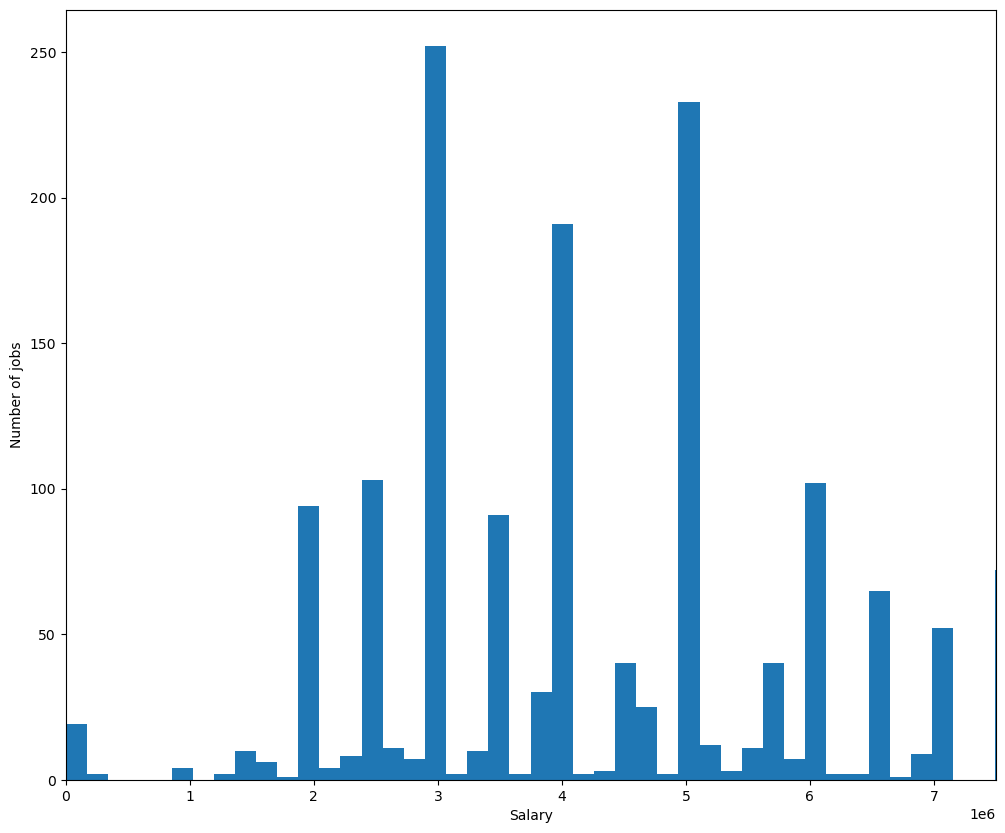

In [99]:
# Histogram where x-axis is from 0 to 6000000 with 60 bins and y-axis is the number of jobs with that salary
plt.figure(figsize=(12, 10))
plt.hist(df['min_salary'].astype(int), bins=600)
plt.xlabel('Salary')
plt.ylabel('Number of jobs')
plt.xlim(0, 7500000)
plt.show()

In [105]:
df_titles = pd.DataFrame(df['job_title'], columns=['job_title', 'Count'])
df_titles['Count'] = 1
df_titles = df_titles.groupby('job_title').sum()
df_titles.reset_index(inplace=True)
df_titles.sort_values('Count',ascending=False,inplace=True)
df_titles

,job_title,Count
202,менеджер,300
416,специалист,97
270,оператор,68
340,продавец консультант,64
92,грузчик комплектовщик,41
...,...,...
208,менеджер гибкой,1
207,менеджер вложений,1
206,менеджер бытовой,1
205,менеджер бектемирский,1


Text(0.5, 1.0, 'Distribution of job titles')

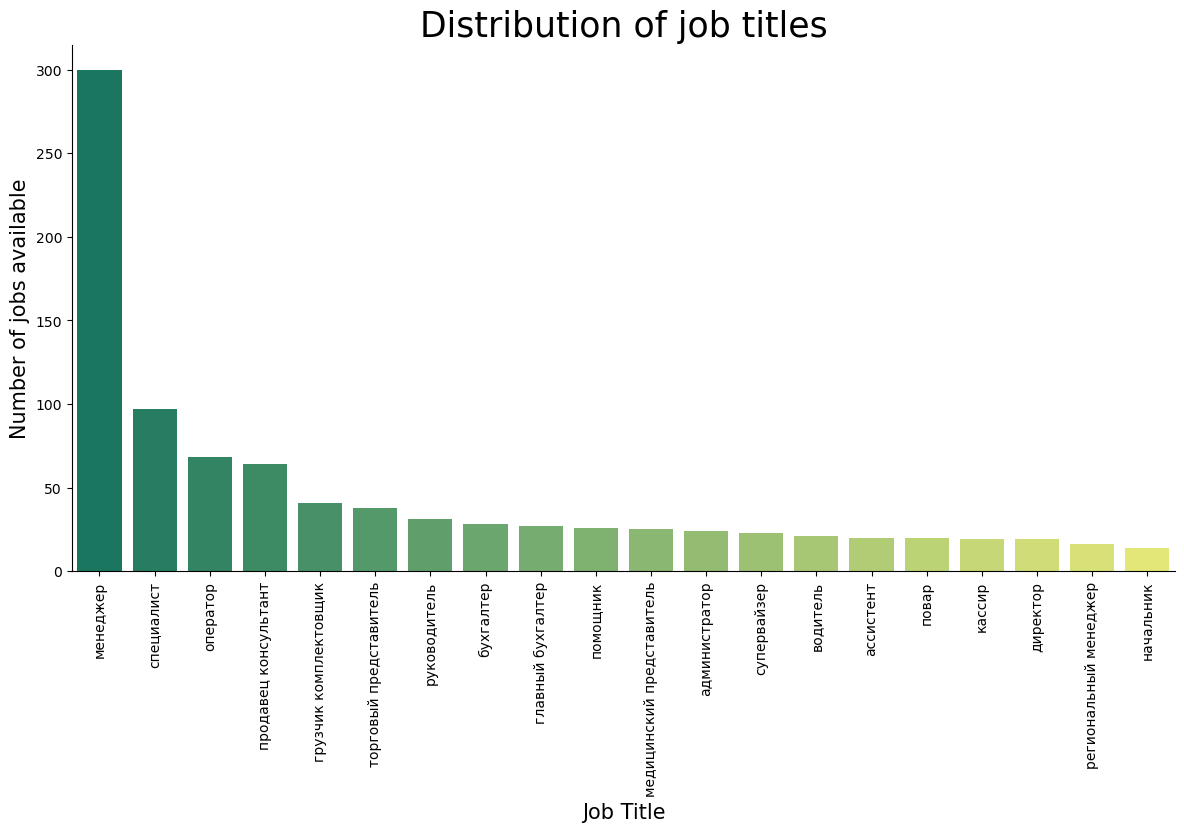

In [108]:
top_20_df = df_titles.nlargest(20, 'Count')
sns.catplot(x='job_title', y='Count', data=top_20_df, kind='bar', aspect=2, height=6, palette='summer')
plt.xticks(rotation=90)
plt.xlabel('Job Title',size=15)
plt.ylabel('Number of jobs available',size=15)
plt.title('Distribution of job titles',size=25)

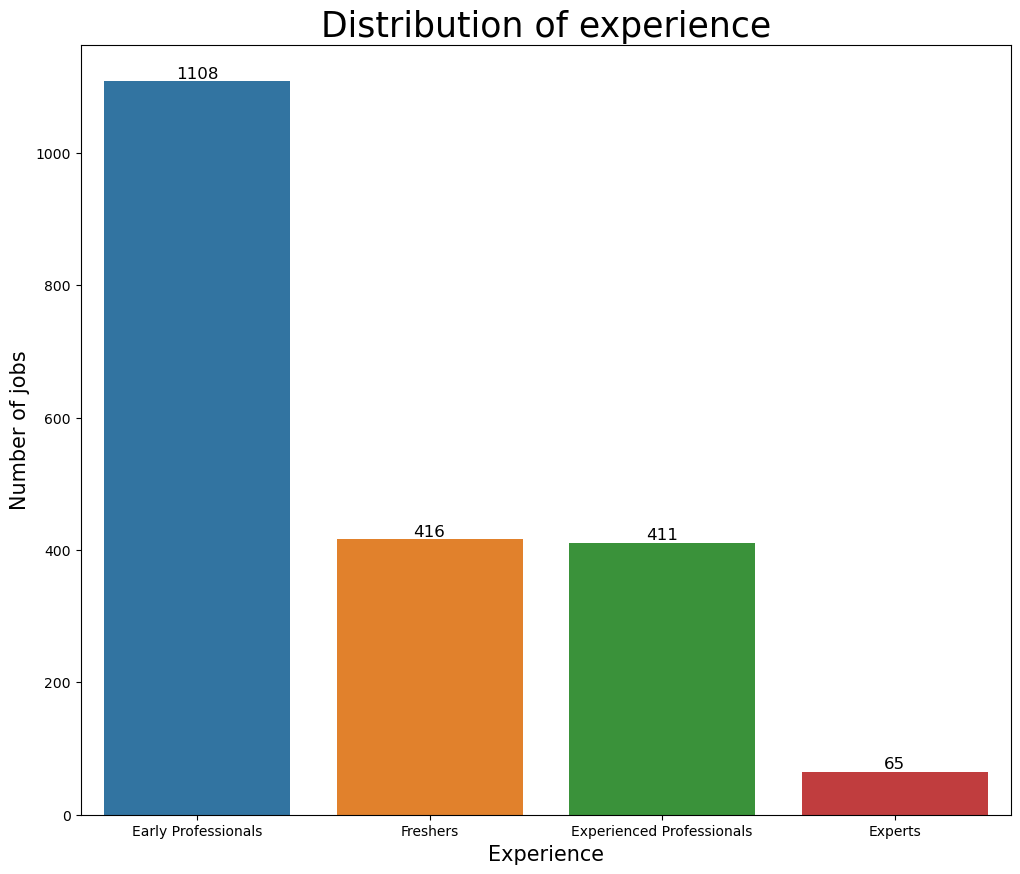

In [151]:
# sns barplot of experience
# x-axis is the experience and y-axis is the number of jobs with that experience
# name the bars as follows:
# 0 - Freshers
# 1 - Early Professionals
# 2 - Experienced Professionals
# 3 - Experts
# In descending order of number of jobs with count on top of each bar
order = df['experience'].value_counts().index

# Define your labels in the order of 'experience' categories.
labels = ['Early Professionals', 'Freshers', 'Experienced Professionals', 'Experts']


plt.figure(figsize=(12, 10))
ax = sns.countplot(x='experience', data=df, order=order)
plt.xlabel('Experience', size=15)
plt.ylabel('Number of jobs', size=15)
plt.title('Distribution of experience', size=25)
plt.xticks(range(len(order)), labels)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()

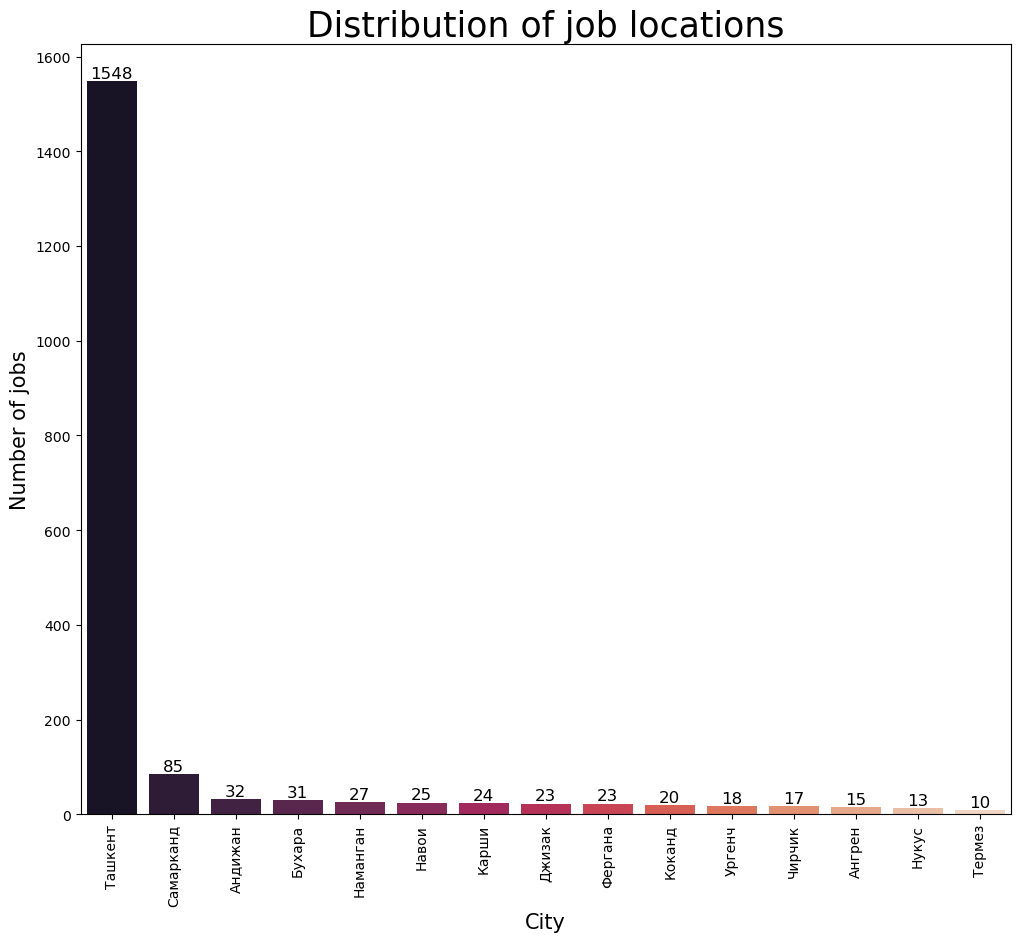

In [161]:
# bar plot of job locations
# x-axis is the location and y-axis is the number of jobs in that location
# In descending order of number of jobs with count on top of each bar
# Only show the top 20 locations
order = df['city'].value_counts().index[:15]


plt.figure(figsize=(12, 10))
ax = sns.countplot(x='city', data=df, order=order, palette='rocket')
plt.xlabel('City', size=15)
plt.ylabel('Number of jobs', size=15)
plt.title('Distribution of job locations', size=25)
plt.xticks(rotation=90)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()

In [202]:
# wordcloud of top 20 companies

companies = pd.DataFrame(df['company'], columns=['company', 'Count'])
companies['Count'] = 1
companies = companies.groupby('company').sum()
companies.reset_index(inplace=True)
companies.sort_values('Count',ascending=False,inplace=True)
companies[:20]

,company,Count
482,ООО Uzum Market,55
608,Яндекс Крауд,50
524,ООО МК Эксперт,50
331,ООО INFORABOTA,40
305,ООО FoodMall Tash,36
527,ООО МегРусНефть,33
422,ООО RUN BUSINESS SOLVES,29
239,ООО BORIS INTERNATIONAL,21
492,ООО Xalq Retail,20
324,ООО HUMAN AND CAPITAL,20


In [203]:
# Remove words such as 'ООО', 'СП', 'ИП'
companies['company'] = companies['company'].str.replace('ООО', '')
companies['company'] = companies['company'].str.replace('СП', '')
companies['company'] = companies['company'].str.replace('ИП', '')

In [204]:
companies[:20]

,company,Count
482,Uzum Market,55
608,Яндекс Крауд,50
524,МК Эксперт,50
331,INFORABOTA,40
305,FoodMall Tash,36
527,МегРусНефть,33
422,RUN BUSINESS SOLVES,29
239,BORIS INTERNATIONAL,21
492,Xalq Retail,20
324,HUMAN AND CAPITAL,20


In [205]:
companies['company'] = companies['company'].str.replace('Antal International Tashkent Xususiy Bandlik Agentligi', 'Antal')

In [206]:
companies[:20]

,company,Count
482,Uzum Market,55
608,Яндекс Крауд,50
524,МК Эксперт,50
331,INFORABOTA,40
305,FoodMall Tash,36
527,МегРусНефть,33
422,RUN BUSINESS SOLVES,29
239,BORIS INTERNATIONAL,21
492,Xalq Retail,20
324,HUMAN AND CAPITAL,20


In [207]:
companies['company'] = companies['company'].str.replace('Uzum Market', 'Uzum')
companies['company'] = companies['company'].str.replace('Яндекс Крауд', 'Яндекс')

In [208]:
companies['company'] = companies['company'].str.replace(' ', '_')

In [209]:
companies[:20]

,company,Count
482,Uzum,55
608,Яндекс,50
524,МК_Эксперт,50
331,INFORABOTA,40
305,FoodMall_Tash,36
527,МегРусНефть,33
422,RUN_BUSINESS_SOLVES,29
239,BORIS_INTERNATIONAL,21
492,Xalq_Retail,20
324,HUMAN_AND_CAPITAL,20


In [210]:
# Remove '_' if they are at the beginning or end of the string
companies['company'] = companies['company'].str.strip('_')

In [211]:
companies[:20]

,company,Count
482,Uzum,55
608,Яндекс,50
524,МК_Эксперт,50
331,INFORABOTA,40
305,FoodMall_Tash,36
527,МегРусНефть,33
422,RUN_BUSINESS_SOLVES,29
239,BORIS_INTERNATIONAL,21
492,Xalq_Retail,20
324,HUMAN_AND_CAPITAL,20


In [212]:
companies['company'] = companies['company'].str.replace('STAR_GROUP_(_STAR_DISTRIBUTION_)', 'STAR_GROUP')
companies['company'] = companies['company'].str.replace('_HENGYUAN_CEMENT', 'HENGYUAN_CEMENT')

/var/folders/k2/my524t8x2ps9cxhh6hfrxlsr0000gn/T/ipykernel_928/3032559047.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  companies['company'] = companies['company'].str.replace('STAR_GROUP_(_STAR_DISTRIBUTION_)', 'STAR_GROUP')


In [213]:
companies[:20]

,company,Count
482,Uzum,55
608,Яндекс,50
524,МК_Эксперт,50
331,INFORABOTA,40
305,FoodMall_Tash,36
527,МегРусНефть,33
422,RUN_BUSINESS_SOLVES,29
239,BORIS_INTERNATIONAL,21
492,Xalq_Retail,20
324,HUMAN_AND_CAPITAL,20


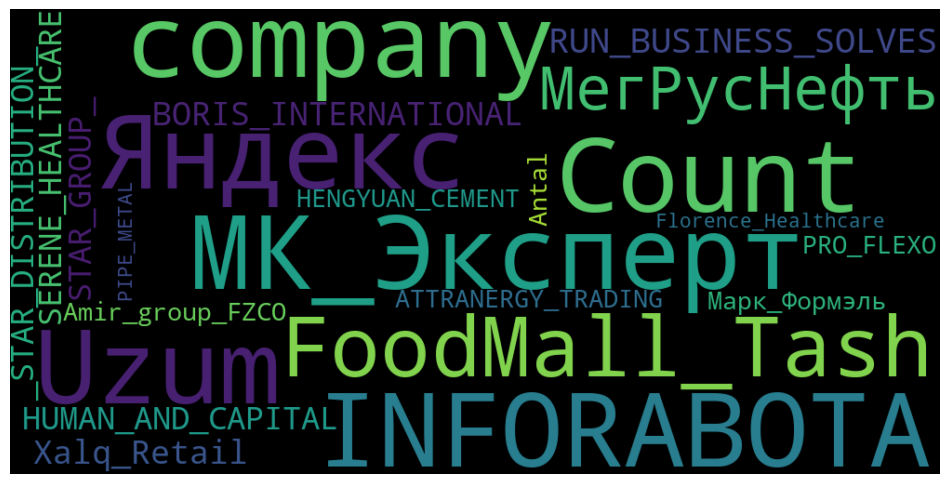

In [217]:
# wordcloud of top 20 companies
from wordcloud import WordCloud

plt.figure(figsize=(12, 10))
wordcloud = WordCloud(width=1000, height=500, random_state=42, max_font_size=110).generate(str(companies[:20]))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()